<a href="https://colab.research.google.com/github/TranNgocXuanThanh/Genderdetection-RandomForest/blob/main/RandomForest_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<ipython-input-13-744de6dedbb0>:46: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


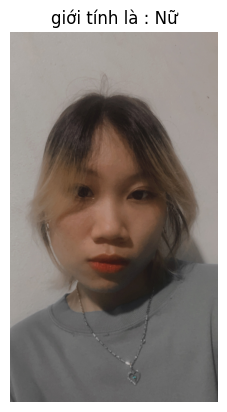

In [13]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

data_dir = '/content/drive/MyDrive/Genderdetection/'

# Hàm trích xuất đặc trưng từ hình ảnh gương mặt
def extract_features(image_path):
    # Đọc hình ảnh
    image = cv2.imread(image_path)

    # Tính tổng số điểm ảnh trung bình làm đặc trưng
    features = np.mean(image)

    return features

# Tạo danh sách hình ảnh và nhãn từ thư mục dữ liệu
images = []
labels = []
for filename in os.listdir(data_dir):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        image_path = os.path.join(data_dir, filename)
        label = 1 if filename.startswith('nam') else 0
        images.append(image_path)
        labels.append(label)

# Trích xuất đặc trưng từ danh sách hình ảnh
features = [extract_features(image) for image in images]

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Khởi tạo mô hình Random Forest
model = RandomForestClassifier()

# Chuyển đổi kích thước dữ liệu đầu vào
X_train = np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

# Huấn luyện mô hình trên tập huấn luyện
model.fit(X_train, y_train)

# Đường dẫn đến hình ảnh cần kiểm tra
test_image_path = '/content/drive/MyDrive/Genderdetection/nu83.jpg'

# Trích xuất đặc trưng từ hình ảnh kiểm tra
test_features = extract_features(test_image_path)

# Reshape dữ liệu thành 2D
test_features = np.array(test_features).reshape(1, -1)

# Dự đoán giới tính từ đặc trưng của hình ảnh kiểm tra
prediction = model.predict(test_features)

# In kết quả dự đoán
if prediction == 1:
    gender = "Nam"
else:
    gender = "Nữ"

# Hiển thị hình ảnh và kết quả dự đoán
image = cv2.imread(test_image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)
plt.title("giới tính là : " + gender)
plt.axis('off')
plt.show()